Выберите тип распределения:
1. Нормальное распределение
2. Равномерное распределение
3. Экспоненциальное распределение

Автоматически сгенерированные параметры:
Математическое ожидание: 6.92
Стандартное отклонение: 5.25

Первые 10 значений: [ 4.86741723  3.15907129  3.41583582  9.48955629 10.26197593 12.95901883
 11.18590069 -3.84687096 11.67585244 10.44086663]

Строим эмпирическую функцию распределения...


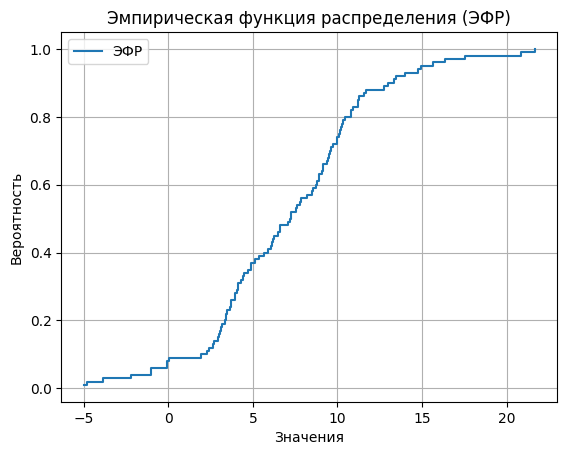


Строим гистограмму...


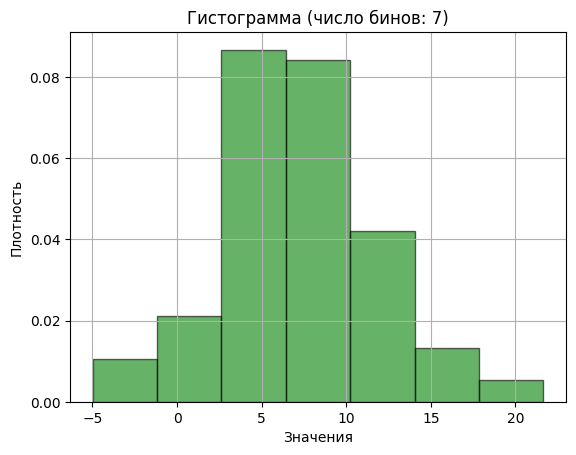


Выборочные характеристики:
Среднее: 7.1183
Дисперсия: 24.4231
Стандартное отклонение: 4.9420


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для автоматической генерации параметров распределения
def generate_parameters(distribution_type="normal"):
    """
    Генерирует математическое ожидание и стандартное отклонение
    для выбранного типа распределения.
    """
    if distribution_type == "normal":
        mean = np.random.uniform(0, 100)    # Случайное среднее в диапазоне [0, 100]
        std_dev = np.random.uniform(1, 20)  # Случайное стандартное отклонение в диапазоне [1, 20]
    elif distribution_type == "uniform":
        a = np.random.uniform(0, 50)        # Нижняя граница равномерного распределения
        b = np.random.uniform(a + 1, 100)   # Верхняя граница равномерного распределения
        mean = (a + b) / 2                  # Математическое ожидание равномерного распределения
        std_dev = np.sqrt((b - a)**2 / 12)  # Стандартное отклонение равномерного распределения
    elif distribution_type == "exponential":
        lambda_par = np.random.uniform(0.1, 2)  # Параметр λ экспоненциального распределения
        mean = 1 / lambda_par                   # Математическое ожидание
        std_dev = mean                          # Стандартное отклонение совпадает с математическим ожиданием
    else:
        raise ValueError("Неизвестный тип распределения.")

    return mean, std_dev

# Функция для симуляции данных
def simulate_data(mean, std_dev, num_samples, distribution_type="normal"):
    """
    Симулирует данные из выбранного распределения.
    """
    if distribution_type == "normal":
        data = np.random.normal(loc=mean, scale=std_dev, size=num_samples)
    elif distribution_type == "uniform":
        a = mean - np.sqrt(3) * std_dev  # Нижняя граница равномерного распределения
        b = mean + np.sqrt(3) * std_dev  # Верхняя граница равномерного распределения
        data = np.random.uniform(low=a, high=b, size=num_samples)
    elif distribution_type == "exponential":
        lambda_par = 1 / mean  # Параметр λ экспоненциального распределения
        data = np.random.exponential(scale=1 / lambda_par, size=num_samples)
    else:
        raise ValueError("Неизвестный тип распределения.")

    return data

# Функция для построения эмпирической функции распределения (ЭФР)
def plot_empirical_cdf(data):
    """
    Строит эмпирическую функцию распределения (ЭФР).
    """
    sorted_data = np.sort(data)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    plt.step(sorted_data, y_values, where='post', label='ЭФР')
    plt.xlabel('Значения')
    plt.ylabel('Вероятность')
    plt.title('Эмпирическая функция распределения (ЭФР)')
    plt.grid()
    plt.legend()
    plt.show()

# Функция для построения гистограммы
def plot_histogram(data):
    """
    Строит гистограмму данных с автоматическим выбором числа бинов по формуле Стерджесса.
    """
    n = len(data)
    k = int(1 + 3.322 * np.log10(n))  # Формула Стерджесса

    plt.hist(data, bins=k, density=True, alpha=0.6, color='g', edgecolor='black')
    plt.xlabel('Значения')
    plt.ylabel('Плотность')
    plt.title(f'Гистограмма (число бинов: {k})')
    plt.grid()
    plt.show()

# Функция для вычисления выборочных характеристик
def calculate_sample_statistics(data):
    """
    Вычисляет выборочные характеристики: среднее, дисперсию и стандартное отклонение.
    """
    mean = np.mean(data)
    variance = np.var(data, ddof=1)  # Дисперсия с поправкой на несмещённость
    std_dev = np.std(data , ddof=1)  # Стандартное отклонение
    return {
        'Среднее': mean,
        'Дисперсия': variance,
        'Стандартное отклонение': std_dev
    }

# Основная часть программы
if __name__ == "__main__":
    # Выбор типа распределения
    print("Выберите тип распределения:")
    print("1. Нормальное распределение")
    print("2. Равномерное распределение")
    print("3. Экспоненциальное распределение")
    choice = int(input("Введите номер: "))

    distribution_types = ["normal", "uniform", "exponential"]
    distribution_type = distribution_types[choice - 1]

    # Автоматическая генерация параметров
    mean, std_dev = generate_parameters(distribution_type)
    print(f"\nАвтоматически сгенерированные параметры:")
    print(f"Математическое ожидание: {mean:.2f}")
    print(f"Стандартное отклонение: {std_dev:.2f}")

    # Ввод количества сгенерированных значений
    num_samples = int(input("\nВведите количество сгенерированных значений: "))

    # Симуляция данных
    data = simulate_data(mean, std_dev, num_samples, distribution_type)
    print("\nПервые 10 значений:", data[:10])

    # Построение ЭФР
    print("\nСтроим эмпирическую функцию распределения...")
    plot_empirical_cdf(data)

    # Построение гистограммы
    print("\nСтроим гистограмму...")
    plot_histogram(data)

    # Вычисление выборочных характеристик
    stats = calculate_sample_statistics(data)
    print("\nВыборочные характеристики:")
    for key, value in stats.items():
        print(f"{key}: {value:.4f}")

In [2]:
data

array([ 4.86741723,  3.15907129,  3.41583582,  9.48955629, 10.26197593,
       12.95901883, 11.18590069, -3.84687096, 11.67585244, 10.44086663,
        4.44639859,  8.19145593,  6.45639507, 10.00002192,  9.70796527,
        2.91639965,  3.727495  ,  8.88749935,  3.91560823,  8.70835573,
        3.91905604,  7.59136339,  7.07399989, 13.35605394, -4.99025301,
        4.1119014 ,  4.30399032,  3.39154537, 11.59297327, 12.7459928 ,
        2.67471035, 10.81600483,  7.79799487,  9.38846452,  4.90144328,
        2.98917612, 13.99227252,  5.67226995,  8.78849953,  5.11418308,
        3.11389614, -1.01342782,  2.66185156,  3.72863045,  6.61383761,
        2.26733339,  3.49488763,  4.12945837, 11.28144555,  9.55396455,
        6.08868686,  6.16526695,  2.4065859 , 20.8217057 , 10.93830359,
        9.14008745,  5.89969289,  7.57202747, 14.92563228, -0.99264239,
        6.61343564,  3.05093595,  9.98217662, 15.61820715, 11.19398987,
       -2.21922301,  0.05654852, 16.36567437,  9.64189094,  8.93